<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/2A/Majeure%20Signal/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

Time : 8h

# Disclaimer

We will refer to :
- AutoEncoder as AE
- Multi Layer Perceptron as MLP


# Introduction

So basically during the part 1 of this lab, we have seen JPEG Compression. JPEG compression is a general algorithm that can compress any image. Let's first see your understanding of the JPEG algorithm :
* What are the component in the Encoding part of the algorithm ?
* What are the component in the Decoding part of the algorithm ?
* Is the down-sampling phase of JPEG linear ? (i.e : in a y = ax+b form)
* Is it a lossless compression algorithm ?

# Your Mission : AI for the Win


Hi there, we are a Big Company and we need your help. We have some images that we want to compress. We tried the JPEG algorithm but we want to try some new state of the art methods. Your mission is to help us as a Data Scientist in this task by creating a DL model that compresses image with as less loss as possible.

Goal of this lab :
* Get to know Deep Learning and PyTorch Framework
* Learn how to compress images using AutoEncoders
* Understand the differences between JPEG compression and Deep Learning for compression

Alright, let's get started.

<img src="https://i.pinimg.com/originals/16/b2/96/16b296afb78ec57d12c931bc72b42eec.gif">

In [83]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST, CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Reading the Docs 

Welcome to Big Company, as usual when beginning a new project you have some reading to do. Take 5-10 minutes to read the following documentation to understand something

## What is Deep Learning ?

Deep Learning is a branch of AI where you **teach a Model** a certain **task** using a **Dataset**. The Model is composed of **Layers of Neurons** that are updated using a **Loss**. The Model infers a prediction from an **input**. In fact, a Deep Neural Network can be seen as a complex function ${f}$ that maps the input data to a learned space from the Dataset. Note the bold words. These are the important things you need to understand about Deep Learning. 

## Generalities on AutoEncoder

An autoencoder is a model able to reconstruct an input from a Latent Space.
An autoencoder (AE) is composed of 2 models :
* an encoder model that encodes input data into a latent space
* a decoder model that recreates the input image from the latent space



Think of it as the Chinese Whispers (Téléphone Arabe en francais) game :
- First player says a sentence
- Second player repeats the sentence of First player to Third player
- Third player repeats the sentence of Second player to Fourth player
- ...
- The final player repeats the sentence of Before Last Player, which by recurrence should be what First Player said.

This basically is an AutoEncoder :
- Player 1 sends a Voice signal that is compressed by all the Players
- Last Player must reconstruct perfectly the Voice Signal of Player 1 from the compressed signal of all the previous players.


<img src = "https://journals.openedition.org/marges/docannexe/image/364/img-2.jpg" width="400" height="500">

You will code two types of AE models :
* MLP style
* Conv style


## Generalities on Deep Learning

In this part, we are going to talk about important stuff in Deep Learning.

### Layers

A Layer is an important part of a Model. In fact, it is the key element of a DL Model. A Layer is a structure that takes information from a layer to pass them to the next layer. In a DL Network, each layer extracts features. 

### Activation Functions


# Data : Exploring the Unknown

 🔊 🔊 🔊 **Message from the Data Engineering Team** 🔊 🔊 🔊

Wazzaaaaaaaaa, so we gathered Data from everywhere and labeled them. 
As you asked, we send you the API for you to load the Data. But have a look at the Data, coz you neva know.
Have a good day :D

Data Engineering Team

## Dataset

<img src="https://labelyourdata.com/img/article-illustrations/splitting_data.png" height=300>



When training  a DL model, we use a Dataset. The model uses the Dataset to learn something for a task. We usually divide the Dataset into Train, Valid, Test Dataset.
- Train Dataset is used to train the Model
- Validation Dataset is used to watch the Model's training
- Test Dataset is used to test the Model


<img src="https://i.imgflip.com/653bu2.jpg" height=400>

### Understanding the Data : Data Exploration

Ok we can look at what the Data Engineering Team sent us. Let's understand the Dataset. Let's use their API.


- What is the size of the train dataset ?
- What are the elements available in one piece of data ? (image,label)
- What is the shape of one piece of data ?
- What is the type of one piece of data ?
- Plot few elements of the dataset using Matplotlib.

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([1, 28, 28])


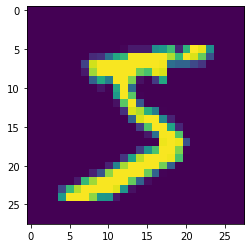

In [4]:
# TODO: Load MNIST Train Dataset from TorchVision

dataset = MNIST('', train=True, download=True, transform=transforms.ToTensor())

# TODO: What's the size of the Dataset ?
# TODO: Retrieve one element of the Dataset ? What is the shape of one piece of Data ? 

size_of_dataset =  len(dataset)
data = dataset[0]
print(data[0].shape)

# TODO: Plot the retrieved Data

plt.imshow(data[0].permute(1, 2, 0)[...,0])

As you can see, there's a train attribute to the MNIST Class. When it's set to True, you're loading the train Dataset. Hence, change it to false to load the test Dataset

In [5]:
mnist_test =  MNIST('', train=False, download=True, transform=transforms.ToTensor())

Let's verify that the Data in the Test dataset are in the same style of the Train Dataset :    
- Plot few Data from the Test Dataset with its label.

torch.Size([1, 28, 28])


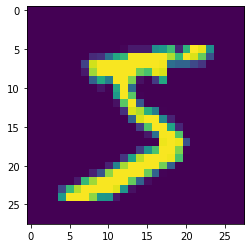

In [6]:

size_of_dataset =  len(dataset)
data = dataset[0]
print(data[0].shape)

# TODO: Plot the retrieved Data

plt.imshow(data[0].permute(1, 2, 0)[...,0])

### The third one : Creating the Validation Dataset

At this moment, we have a Train and a Test Dataset. We also like having a Validation Dataset. 
The Validation Dataset allows us to follow the models training. In fact, the Validation Dataset is sent to the model while training. However, no gradients are computed for the Validation Dataset Data resulting in no update on the weights.

In [7]:
dataset = MNIST('', train=True, download=True, transform=transforms.ToTensor())
mnist_test =  MNIST('', train=False, download=True, transform=transforms.ToTensor())
mnist_train, mnist_val = random_split(dataset, [55000, 5000])


### Creating the Dataloader

So the Dataset returns one element at a time. In DL, we like sending many items at the same time to the model. We form BATCH of Data using a DataLoader. Dataloader are an iterable over the dataset. It means that the Dataloader will form BATCH of Data for you and fetch them 
- Create a DataLoader for your Training, Valid and Testing Dataset

In [8]:
train_loader = DataLoader(mnist_train, batch_size=128,drop_last =True)
val_loader = DataLoader(mnist_val, batch_size=128,drop_last =True)
test_loader = DataLoader(mnist_test, batch_size= 32,drop_last = True)

Did the Data Engineer do a good work ?
- Is there enough data ?
- Are they easily accessible ?
- Are they correctly labeled ?



# Creating the Model : The AutoEncoder

Now that we saw what the data was and created our datasets, we need to fullfil our mission. We need a model.

<img src="https://i.imgflip.com/640uob.jpg" height=300>

A Senior Data Scientist said that we should explore the path of AutoEncoders ! Alright let's write some readable codes. Our code must be modulable and easy to read. We should try two types of AutoEncoders :    
- MLP Style
- Conv Style

The Senior Data Scientist gave some instructions for us to follow.

- Use PyTorch and Create Modulable and Stackable Models that inherits from nn.Module
- Choose wisely our Optimizer and Loss

## MLP Style : Exploring the Neurons

<img src='https://www.researchgate.net/publication/344394387/figure/fig1/AS:974657746399232@1609387923440/Figure-Computational-Schematics-of-the-MLP-and-the-autoencoder.png'>


As per what the Senior Data Scientist said, we will first try a MLP AE.
We have to create few nets:
- MLPDown : a Linear model and its activation function that compresses the Input
- Encoder : a stack of multiples MLPDown to create the compressed version of the Image
- MLPUp : a Linear model and its activation function that decompresses the Input
- Decoder : a stack of multiple MLPUp to recreate the Input Image from the compression.



## Some more theory..

In fact, we can look at the model as a big function :

* The Encoder : This part of the model compresses the input image to a compressed version of it, where $f(x)= z$, where $x$ is the input image, and $z$ the compressed representation of it.
* The Decoder : This part of the model decompresses the compressed representation $z$ to the decompressed image $\tilde{x}$, in other terms we have a function $g$ where, $\tilde{x} = g(z)$
* The AutoEncoder : by stacking the Encoder and the Decoder, and as we want $\tilde{x} = x$ (a.k.a the reconstructed image as similar as the input image), we can rewrite the AE as $\tilde{x} = g(z) = g\circ f(x)=  x$ where $g= f^{-1}$



The bottleneck forces a compressed representation of the original input. 

Quick Tips : A PyTorch module is usually composed of two methods : 

- Init to initialize the class
- forward to forward the data through your model

#### Creating a Model in PyTorch

Creating a model in PyTorch is simple. A PyTorch is an object that inherits from nn.Module. The pseudo-code is the following :     

A model in PyTorch is defined as follows:

```
class Model(nn.Module):
  def __init__(self,...):
    """"
    Defines the model. You can put the input size as a parameter if needed..
    """"
    super().__init__() # to init the main class
    self.layers = ... # defining the model : could be Conv2d, Linear, RNN, LSTM


  def forward(self,x):
    """
    The input x is forwarded through the neural net. 
    """
    output = self.layers(x)
    return output

  # Other methods go down
```

More informations : https://pytorch.org/docs/stable/nn.html


### Correcting the Mistakes

First, we will try a really simple model :
* an Input Dense Layer
* a Latent Space
* an Output Dense Layer
We have received some codes from the other members of the Deep Learning Engineering Team. Looks like there are some mistakes.. Let's correct them.

In [94]:
class AutoEncoder_MLP(nn.Module):
  def __init__(self, input_size, compressed_space_size):
    """
    The model is an Input Layer, a Hidden Layer and an Output layer 
    """
    super().__init__() # to init the main class
    self.input_size = input_size
    self.output_size = input_size
    self.compressed_space_size = compressed_space_size
    self.input = nn.Sequential(nn.Linear(self.input_size, self.compressed_space_size),
                               nn.ReLU()) 
    self.output = nn.Sequential(nn.Linear(self.compressed_space_size,self.output_size ),
                               nn.Sigmoid())


  def forward(self,x):
    """
    The input x is forwarded through the neural net. 
    """
    compressed_image = self.input(x)
    decompressed_image = self.output(compressed_image)
    return decompressed_image


model = AutoEncoder_MLP(28*28,128)

# Training

We sent our code to the Senior Data Scientist and he validated our code. We can train the model. We have a Model and a Dataset. We need few more things..



## A Loss

We need a Loss Function. The Loss function must tell us how far our predictions are from the Reality. It could be by comparing the distribution of two input data, or by directly comparing using distances the data.

Let's reason. We are recreating an Image that is compressed. It means that the recreated image must be a similar as the original image. i.e $\tilde{x} = x$

<img src="https://i.imgflip.com/653jbl.jpg" height=400>



- How can you calculate the similarity between two vectors ?
- What type of loss do you know that calculates the distance between two inputs ?

In [10]:
criterion = nn.MSELoss()

## An Optimizer

<img src="https://i.imgflip.com/640sfs.jpg" height= 400>

We need something to update the weights of the model. In fact, we need to perform Gradient Descent to recalculate the weights of each layers regarding the model's predictions. The optimizer will search for an Optimum. However, it needs a step to perform this research. This step is called the Learning Rate. The learning rate has a huge effect on the learning. 

<img src=https://miro.medium.com/max/918/0*uIa_Dz3czXO5iWyI. height =300>

In [11]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )

## Some Hyper Parameters

Now we have to define some hyperparameters for the training.

## Training

Now that we have everything that is needed for training, we have to create the training loop. The loop consists of :
* Sending Data through the model to obtain Predictions
* Computing the Loss 
* Backwarding the Loss using Gradients 
* Logging the losses and accuracies (if exists)

In [12]:
num_epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = model.to(device)

for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    for i, data in enumerate(train_loader, 0): 
        # TODO : load the data into two variables
        image, label = data
        # TODO : reshape the input image so that it fit the input layers neuron numbers. Don't forget the Batch Size, the 1rst dimension must always be the Batch Size
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        optimizer.zero_grad()
        outputs = net(image)
        outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        loss.backward()
        optimizer.step()
        running_loss_t += loss.item()
        if i == 50:
          running_loss_t= running_loss_t/50
          print('training loss is :',loss)
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):    
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        outputs = net(image)
        outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        running_loss_v += loss.item()
        if i == 50:
            running_loss_v= running_loss_v/50
            print('validation loss is :',loss)


training loss is : tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0179, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0060, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0045, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0032, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0024, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0023, device='cuda:0', g

## Testing the Compression

Now that we trained our model, let's test it on the test dataset. What does testing mean ? Wait there's an email from the senior Data Scientist :


---

 🔊 🔊 🔊 **Message from the Senior Data Scientist** 🔊 🔊 🔊

Sup' heard you've trained your model. 
Ok so let's test it, shall we ?
Take the test dataloader, iterate through it and send the test data to the model. We need to check how well the decompressed image is..
Don't forget to delete all gradients calculations, it takes time and space for nothing. 


---





Interesting, the Senior talked about deleting all gradient calculations 
* Why must we not compute the gradients for the testing step ?

tensor(0.0018, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0017, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0016, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0.0019, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0.0020, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0.0022, device='cuda:0')
tensor(0.0024, device='cuda:0')
tensor(0.0020, device='cuda:0')
tensor(0.0023, device='cuda:0')
tensor(0.0019, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0.0019, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0019, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0.0015, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0017, device='cuda:0')
tensor(0.0020, device='cuda:0')
tensor(0.0020, device='cuda:0')
tensor(0.0021, device='cuda:0')
tensor(0.0018, device='cuda:0')
tensor(0

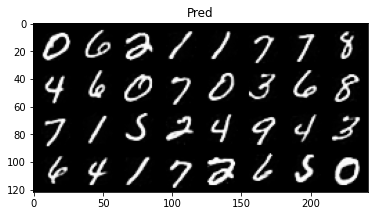

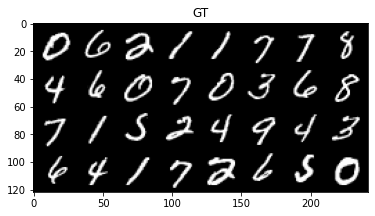

tensor(0.5997, device='cuda:0')

In [13]:
import torch
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import numpy as np

def imshow(img,name= 'GT'):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(name)
    plt.show()

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):    
    image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
    outputs = net(image)
    outputs = outputs.view(data[0].shape)

    loss = criterion(outputs, data[0].to(device))
    print(loss)
    running_loss.append(loss)

# Plot the last batch
imshow(torchvision.utils.make_grid(outputs.detach().cpu()),'Pred')
imshow(torchvision.utils.make_grid(data[0]),'GT')
sum(running_loss)

Ok now to see the effect of the compression, change the latent_size to different values. For example try : 512, 128, 16, 1.


<img src="https://i.imgflip.com/64elyi.jpg" height=200>

training loss is : tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0111, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0065, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0055, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0048, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0044, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0037, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0034, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0031, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0029, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0027, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0026, device='cuda:0', g

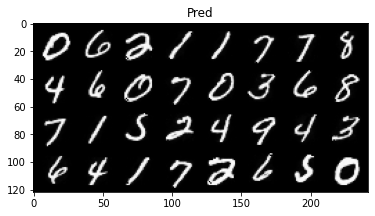

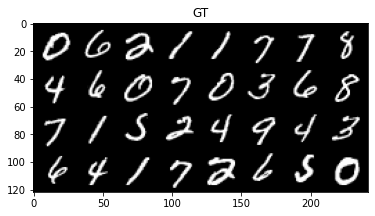

tensor(0.5054, device='cuda:0')

In [14]:
# TODO : Change your model 
model = AutoEncoder(28*28,2048)
# Train it
num_epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    for i, data in enumerate(train_loader, 0): 
        # TODO : load the data into two variables
        image, label = data
        # TODO : reshape the input image so that it fit the input layers neuron numbers. Don't forget the Batch Size, the 1rst dimension must always be the Batch Size
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        optimizer.zero_grad()
        outputs = net(image)
        outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        loss.backward()
        optimizer.step()
        running_loss_t += loss.item()
        if i == 50:
          running_loss_t= running_loss_t/50
          print('training loss is :',loss)
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):    
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        outputs = net(image)
        outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        running_loss_v += loss.item()
        if i == 50:
            running_loss_v= running_loss_v/50
            print('validation loss is :',loss)

# Test it

import torch
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import numpy as np

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):    
    image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
    outputs = net(image)
    outputs = outputs.view(data[0].shape)

    loss = criterion(outputs, data[0].to(device))
    print(loss)
    running_loss.append(loss)

# Plot the last batch
imshow(torchvision.utils.make_grid(outputs.detach().cpu()),'Pred')
imshow(torchvision.utils.make_grid(data[0]),'GT')
sum(running_loss)

## Testing on unseen Data

Alright, we can obsviously say that it works pretty fairly on the Test Data. We should be ok nah ?

Let's test it on other Data.

* Write the code to test the inference on Images taken from the internet.

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


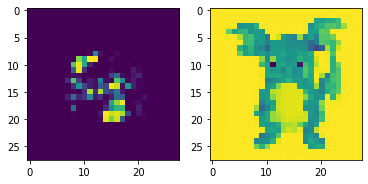

In [81]:

image_filename = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLwsAJaf0m-QmpP056GQMqvY3jTD6cF6FU7Q&usqp=CAU"
image_numpy = cv2.cvtColor(skimage.io.imread(image_filename ),cv2.COLOR_BGR2GRAY)
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Resize((28,28))])

image = transform(image_numpy).unsqueeze(0)
print(image.shape)

#pred = model(image.view(1,-1).to(device))
print(pred.shape)
pred = pred.view(image.shape).squeeze(0).squeeze(0)
print(pred.shape)

fig,axarr = plt.subplots(1, 2)
axarr[0].imshow(pred.detach().cpu().numpy())
axarr[1].imshow(image.squeeze(0).squeeze(0))


* What can you say ?

# Write your Research

Now we need to present our results to the Senior Data Scientist. 
* Sum up all your research on this subject in 2 pages.

You must explain :
* The dataset you used 
* The tests you did
* The models you tested
* The results you had
* The explanation of the results (why it works, why it doesn't)
* How can we compute the compression rate of the model ? 
* Do we need to consider the model's size ?

# Convolutional Layer Style : Seeing a Region

<img src="https://miro.medium.com/max/1838/1*LSYNW5m3TN7xRX61BZhoZA.png" height = 300>

The first sprint is over. The Senior Data Scientist sent a new message 🇮


---
 🔊 🔊 🔊 **Message from the Senior Data Scientist** 🔊 🔊 🔊


Sup'

Good work for your first results. However, we need to try another type of model.
Test the same using Conv2d layers. I know that it is new for you but here are some explanations:  Convolutional Layers are filters that "scans" the input image in order to extract features. 

I sent you some classes that you must reuse in your code. Tell me if it has better results.

Peace

Senior Data Scientist

P.S here's a funny image for ya 

<img src="https://i.imgflip.com/65b89l.jpg" height=400>


---



Take 5 minutes and play with the following link :   

* https://ezyang.github.io/convolution-visualizer/

Questions :    
* What is the stride parameter ?
* What is the padding parameter ?
* What does it change on the output to increase the Kernel Size ?


## Some Definition

Receptive Field : The receptive field are the pixels seen by the kernel layer

# Model Definition : The code they sent us

Hmmm let's have a look at the model sent by the senior Data Scientist. Looks like there are bunch of submodules   

### SubModules : The stem

#### Conv Down

ConvDown is used to compress the input image. It applies a convolution between the input image and the kernel. In fact, it is used to extract features. Our ConvDown Model will be composed of two layers :     
* Conv2d layer
* Non Linearity (ReLU)

<img src="https://www.jeremyjordan.me/content/images/2017/07/no_padding_no_strides.gif">

In [22]:
class ConvDown(nn.Module):

    def __init__(self, input_channel, output_channel, kernel_size = 3):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.model = nn.Sequential(nn.Conv2d(self.input_channel, self. output_channel, kernel_size =self.kernel_size ),
                                    nn.ReLU())
                                    
    def forward(self,x):
        return self.model(x)

#### Conv Up

ConvUp is used to decompress the input image. In fact, it uses extracted features to propose a reconstructed output feature map.

* From what you've seen on the website, is it possible to increase output size map using Conv2d layers ?

We introduce ConvTranpose2D layers, that applies Transpose Convolution over an input image. It also means that these layers upsamples the input image. In fact the ConvTranspose layers learns to upsample the images.

<img src="https://miro.medium.com/max/1400/1*HnxnJDq-IgsSS0q3Lut4xA.gif" height=300>

In [49]:
class ConvUp(nn.Module):

    def __init__(self, input_channel, output_channel, kernel_size = 3 , output = True):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.output = output
        self.model = nn.Sequential(nn.ConvTranspose2d(self.input_channel, self. output_channel, kernel_size =self.kernel_size ),
                                    nn.ReLU()) if output is False else nn.Sequential(nn.ConvTranspose2d(self.input_channel, self. output_channel, kernel_size =self.kernel_size ),
                                    nn.Sigmoid())
        
    def forward(self,x):
        return self.model(x)

### Modules : The Wrappers

#### Encoder

The encoder stacks multiple ConvDown to compress and extract features.

In [50]:
class Encoder(nn.Module):

    def __init__(self,input_channel, output_channel, kernel_size = 3):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.model = nn.Sequential( ConvDown(self.input_channel, self.output_channel//2,self.kernel_size),
                                   ConvDown(self.output_channel//2, self.output_channel,self.kernel_size))
                    
    def forward(self,x):
        return self.model(x)

#### Decoder

The decoder stacks multiple ConvUp to decompress and upsample the input.

In [51]:
class Decoder(nn.Module):

    def __init__(self,input_channel, output_channel, kernel_size = 3, output = True):
        super().__init__()
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.kernel_size = kernel_size
        self.output = output
        self.model = nn.Sequential( ConvUp(self.input_channel,self.input_channel//2,self.kernel_size, False),
                                   ConvUp(self.input_channel//2, self.output_channel,self.kernel_size, self.output))
                    
    def forward(self,x):
        return self.model(x)

### The Conv AutoEncoder : Final Model 

Stack the Encoder and Decoder, we just have to stack them in order to form the AutoEncoder. The stacking is different here as we refer to the input and output channels of each layers.


In [ ]:
class AutoEncoder(nn.Module):

    def __init__(self,input_size,latent_size):
        super().__init__()
        self.input_size = input_size
        self.latent_size = latent_size
        self.model = nn.Sequential(Encoder(self.input_size,self.latent_size),
                                   Decoder(self.latent_size, self.input_size, output= True))

    def forward(self,x):
        return self.model(x)



# Training

We can reuse the previously written code. However, we need to make some changes...

* What changes must we do ?


In [ ]:
# TODO : Change your model 
model = AutoEncoder(1,8)
# TODO : Reload your HyperParameters
num_epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )

# TODO : Rewrite your Training Loop
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    for i, data in enumerate(train_loader, 0): 
        # TODO : load the data into two variables
        image, label = data
        # TODO : reshape the input image so that it fit the input layers neuron numbers. Don't forget the Batch Size, the 1rst dimension must always be the Batch Size
        image, label = data[0].to(device), data[1]
        optimizer.zero_grad()
        outputs = net(image)
        #outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        loss.backward()
        optimizer.step()
        running_loss_t += loss.item()
        if i == 50:
          running_loss_t= running_loss_t/50
          print('training loss is :',loss)
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):    
        image, label = data[0].to(device), data[1]
        outputs = net(image)
        #outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        running_loss_v += loss.item()
        if i == 50:
            running_loss_v= running_loss_v/50
            print('validation loss is :',loss)

# TODO : Rewrite your Testing Loop

import torch
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import numpy as np

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):    
    image, label = data[0].to(device), data[1]
    outputs = net(image)
    loss = criterion(outputs, data[0].to(device))
    print(loss)
    running_loss.append(loss)

# Plot the last batch
imshow(torchvision.utils.make_grid(outputs.detach().cpu()),'Pred')
imshow(torchvision.utils.make_grid(data[0]),'GT')
sum(running_loss)

Hmm interesting.
Let's compare the results :  For the same compressed space size (512, 128, 16, 1) :
* What are the reconstruction values on the test set ? 
* What are the training time ?
* Which model would you advice ? 

# Where's that noise ?

The second sprint is over, but we received a mail for the third sprint


---

 🔊 🔊 🔊 **Message from the Senior Data Scientist** 🔊 🔊 🔊

Sup'
I read somewhere that AE can denoise image. That means that if you add some noise to the input image, the AE will be able to reconsctruct the image without noise. Can you verify that ?

Senior Data Scientist

---


<img src="https://miro.medium.com/max/1400/1*z7SUcHkWp7jT1D_SqvTvgA.png" height=300>

Ok let's verify that, we received a function that add Gaussian Noise to an input image.

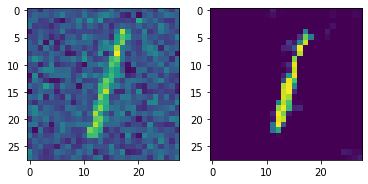

In [79]:
def add_noise(inputs):
     noise = torch.randn_like(inputs)*0.2
     return inputs + noise

test_image = mnist_test.__getitem__(2)[0]
test_image = add_noise(test_image.unsqueeze(0))
denoised_image = model(test_image.to(device))
fig,axarr = plt.subplots(1, 2)
axarr[0].imshow(test_image.squeeze(0).squeeze(0).squeeze(0))
axarr[1].imshow(denoised_image.detach().cpu().squeeze(0).squeeze(0).squeeze(0))



* What can you tell ?
* Does it work with lots of noise ?

# Getting Some Colors (Optional)

This is the fourth and final sprint. After that we can send the model to production. Let's read Senior Data Scientist email 



---
 🔊 🔊 🔊 **Message from the Senior Data Scientist** 🔊 🔊 🔊

Sup'

I like colors. We like colors. But do your model work on colors ? I'm asking the Data Engineer Team to send you the API for CIFAR10 so that you can test. Just reapply the same methodology and send me the results asap

Kiss kiss XOXO

Senior Data Scientist


---







## CIFAR10 : Colors and Classes

 🔊 🔊 🔊 **Message from the Data Engineering Team** 🔊 🔊 🔊

Wazzaaaaaaaaa, the API is ready.
Have a good day :D

Data Engineering Team

### Understanding the Data : Data Exploration

Ok so let's do the same thing as befor Let's use their API.


- What is the size of the train dataset ?
- What are the elements available in one piece of data ? (image,label)
- What is the shape of one piece of data ?
- What is the type of one piece of data ?
- Plot few elements of the dataset using Matplotlib.



In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
dataset_train = CIFAR10(root='./data', train=True,download=True, transform=transform)
dataset_test =  CIFAR10(root='./data', train=False,download=True, transform=transform)

# TODO : Do all the Data Exploration Things. 
# Questions : How similar are the data ? Coding Wise ? Data Wise ?



In [90]:
# TODO : Create the DataLoaders
train_loader = DataLoader(dataset_train, batch_size=128,drop_last =True)
test_loader = DataLoader(dataset_test, batch_size= 32,drop_last = True)

### Train your MLP Model

training loss is : tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0139, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0112, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0078, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0075, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0073, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0071, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0071, device='cuda:0', g

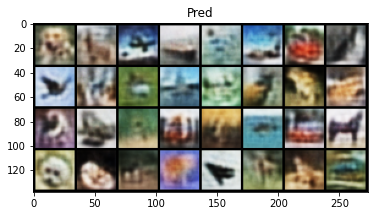

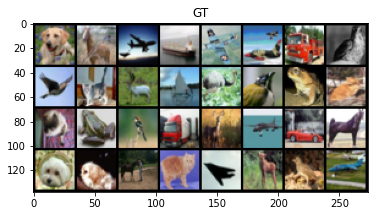

tensor(0.0065, device='cuda:0')

In [100]:
# TODO : Create you
model = AutoEncoder_MLP(32*32*3,1024)
# TODO : Reload your HyperParameters
num_epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )

# TODO : Rewrite your Training Loop
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    for i, data in enumerate(train_loader, 0): 
        # TODO : load the data into two variables
        image, label = data
       # print(image.shape)
        # TODO : reshape the input image so that it fit the input layers neuron numbers. Don't forget the Batch Size, the 1rst dimension must always be the Batch Size
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        optimizer.zero_grad()
        outputs = net(image)
        outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        loss.backward()
        optimizer.step()
        running_loss_t += loss.item()
        if i == 50:
          running_loss_t= running_loss_t/50
          print('training loss is :',loss)
# TODO : Rewrite your Testing Loop

import torch
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import numpy as np

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):    
        image, label = data[0].view(data[0].shape[0],-1).to(device), data[1]
        outputs = net(image)
        outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
  running_loss.append(loss)

# Plot the last batch
imshow(torchvision.utils.make_grid(outputs.detach().cpu()),'Pred')
imshow(torchvision.utils.make_grid(data[0]),'GT')
sum(running_loss)

### Train your Conv Model

In [ ]:
# TODO : Create you
model = AutoEncoder(3,512)
# TODO : Reload your HyperParameters
num_epochs = 20
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = model.to(device)
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate )

# TODO : Rewrite your Training Loop
for epoch in range(num_epochs) : 
    running_loss_t,running_loss_v = 0.0, 0.0
    for i, data in enumerate(train_loader, 0): 
        # TODO : load the data into two variables
        image, label = data
        # TODO : reshape the input image so that it fit the input layers neuron numbers. Don't forget the Batch Size, the 1rst dimension must always be the Batch Size
        image, label = data[0].to(device), data[1]
        optimizer.zero_grad()
        outputs = net(image)
        #outputs = outputs.view(data[0].shape)
        loss = criterion(outputs, data[0].to(device))
        loss.backward()
        optimizer.step()
        running_loss_t += loss.item()
        if i == 50:
          running_loss_t= running_loss_t/50
          print('training loss is :',loss)

# TODO : Rewrite your Testing Loop

import torch
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import numpy as np

with torch.no_grad():
  running_loss = []
  for i, data in enumerate(test_loader, 0):    
    image, label = data[0].to(device), data[1]
    outputs = net(image)
    loss = criterion(outputs, data[0].to(device))
    print(loss)
    running_loss.append(loss)

# Plot the last batch
imshow(torchvision.utils.make_grid(outputs.detach().cpu()),'Pred')
imshow(torchvision.utils.make_grid(data[0]),'GT')
sum(running_loss)

training loss is : tensor(0.0042, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward0>)
training loss is : tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward0>)


# Results

Now analyze your results and write your report.

